### Importations

In [2]:
import numpy as np              # pour les tableaux
import matplotlib.pyplot as plt # pour les graphiques
import pandas as pd             # pour visualiser les données

### Moyenne et incertitude de type A

In [3]:
T_list = np.array([25.0, 24.9, 25.0, 25.1, 25.0, 25.1, 25.1, 25.0, 25.0])
    #liste des périodes
T_moy = np.mean(T_list)                             # moyenne
ecart_T = np.std(T_list, ddof=1)                    # écart-type
incert_T = ecart_T/np.sqrt(len(T_list))             # incertitude de type A
print (f'T = {T_moy:.2f} ± {incert_T:.2f} s')

T = 25.02 ± 0.02 s


### Variables nécessaires pour la régression linéaire

In [4]:
d_list = np.array(
    [20.0,
     25.0,
     30.0,
     35.0,
     40.0,
     45.0,
     50.0,
     55.0,
     60.0]
)*1e-2                           #  distances émetteur et récepteur, en cm
ud = 0.5e-2*np.ones(len(d_list)) # incertitude de 0.5cm sur la distance

t_list = np.array(
    [610,
     770,
     930,
     1080,
     1240,
     1380,
     1510,
     1730,
     1860]
)*1e-6                           # temps de vol en s
ut = 0.1e-3*np.ones(len(t_list)) # incertitude de 0.1ms
a, b = np.polyfit(t_list, d_list, 1) # régression
print(f"a = {a:.3f}, b = {b:.3f}")

a = 320.693, b = 0.004


### Régression linéaire

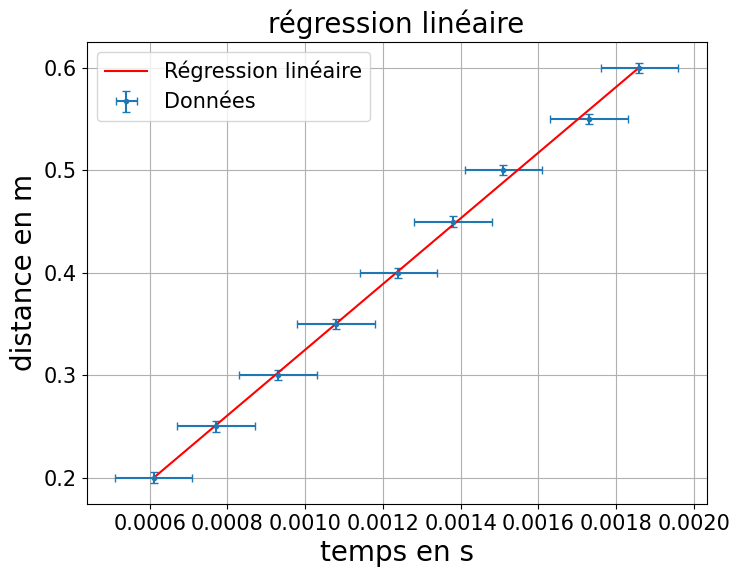

320.69281245231195


In [8]:
# découpage de l'intervalle pour fonction lisse
xliste = np.linspace(min(t_list), max(t_list), 1000)
# Liste des points y_i obtenus par régression
yliste = a*xliste+b

plt.figure(figsize=(8, 6))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('temps en s', fontsize=20)
plt.ylabel('distance en m', fontsize=20)

plt.errorbar(t_list, d_list, capsize=3,
             xerr=ut, yerr=ud, fmt='.',
             label='Données')
plt.plot(xliste, yliste,
         'r', label='Régression linéaire')

plt.title("régression linéaire",
          fontsize=20)
plt.legend(fontsize=15)
plt.show()
print(a)

### Monte-Carlo

In [10]:
Dd = ud*np.sqrt(3)
Dt = ut*np.sqrt(3)

N = 100000
liste_a, liste_b = [], []
for i in range(0, N):
    d_simu = d_list + np.random.uniform(-Dd, Dd)
    t_simu = t_list + np.random.uniform(-Dt, Dt)
    a_simu, b_simu = np.polyfit(t_simu , d_simu , 1)
    liste_a.append(a_simu)
    liste_b.append(b_simu)

a, b = np.mean(liste_a), np.mean(liste_b)
ua, ub = np.std(liste_a, ddof=1), np.std(liste_b, ddof=1)
print(f'a = {a:.2f} ± {ua:.2f}')

a = 307.84 ± 25.06
